In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics


In [36]:
data=pd.read_csv("./sales.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [31]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Handling mising data

In [41]:
age=data["Item_Weight"].mean()
data['Item_Weight'].fillna(age,inplace=True)

In [39]:
tot_outlet_size=data["Outlet_Size"].value_counts()
print(tot_outlet_size)

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64


In [38]:
data["Outlet_Size"].fillna("Medium",inplace=True)

In [42]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data *Analysis*

In [43]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


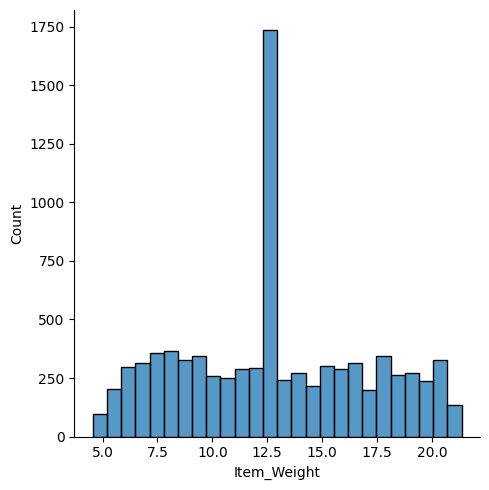

In [53]:
sns.displot(data["Item_Weight"])
plt.show()

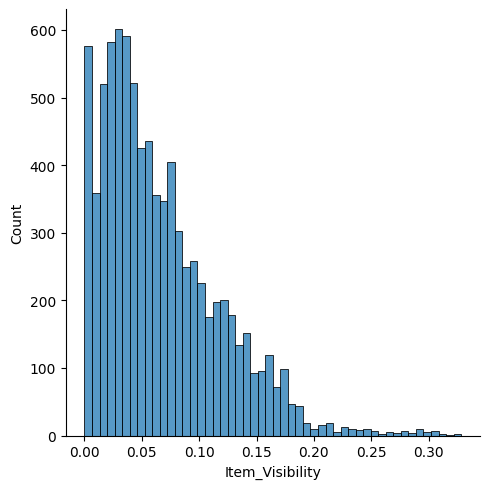

In [54]:
sns.displot(data["Item_Visibility"])
plt.show()

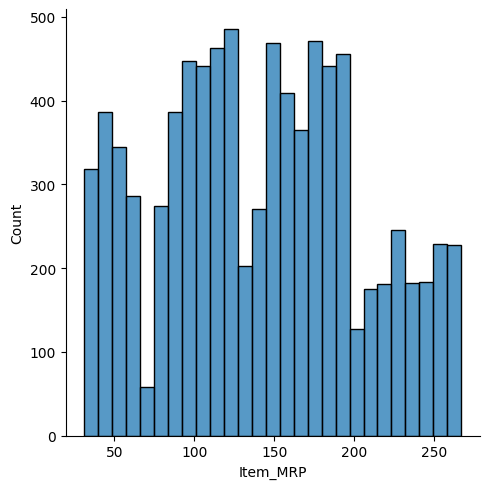

In [57]:
sns.displot(data["Item_MRP"])
plt.show()

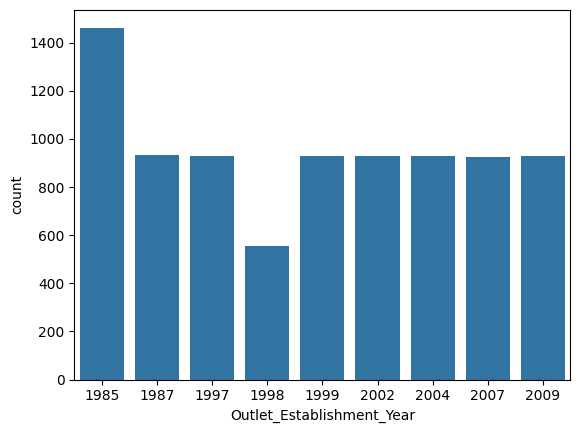

In [61]:
sns.countplot(x="Outlet_Establishment_Year",data=data)
plt.show()

<Axes: xlabel='Item_Type', ylabel='count'>

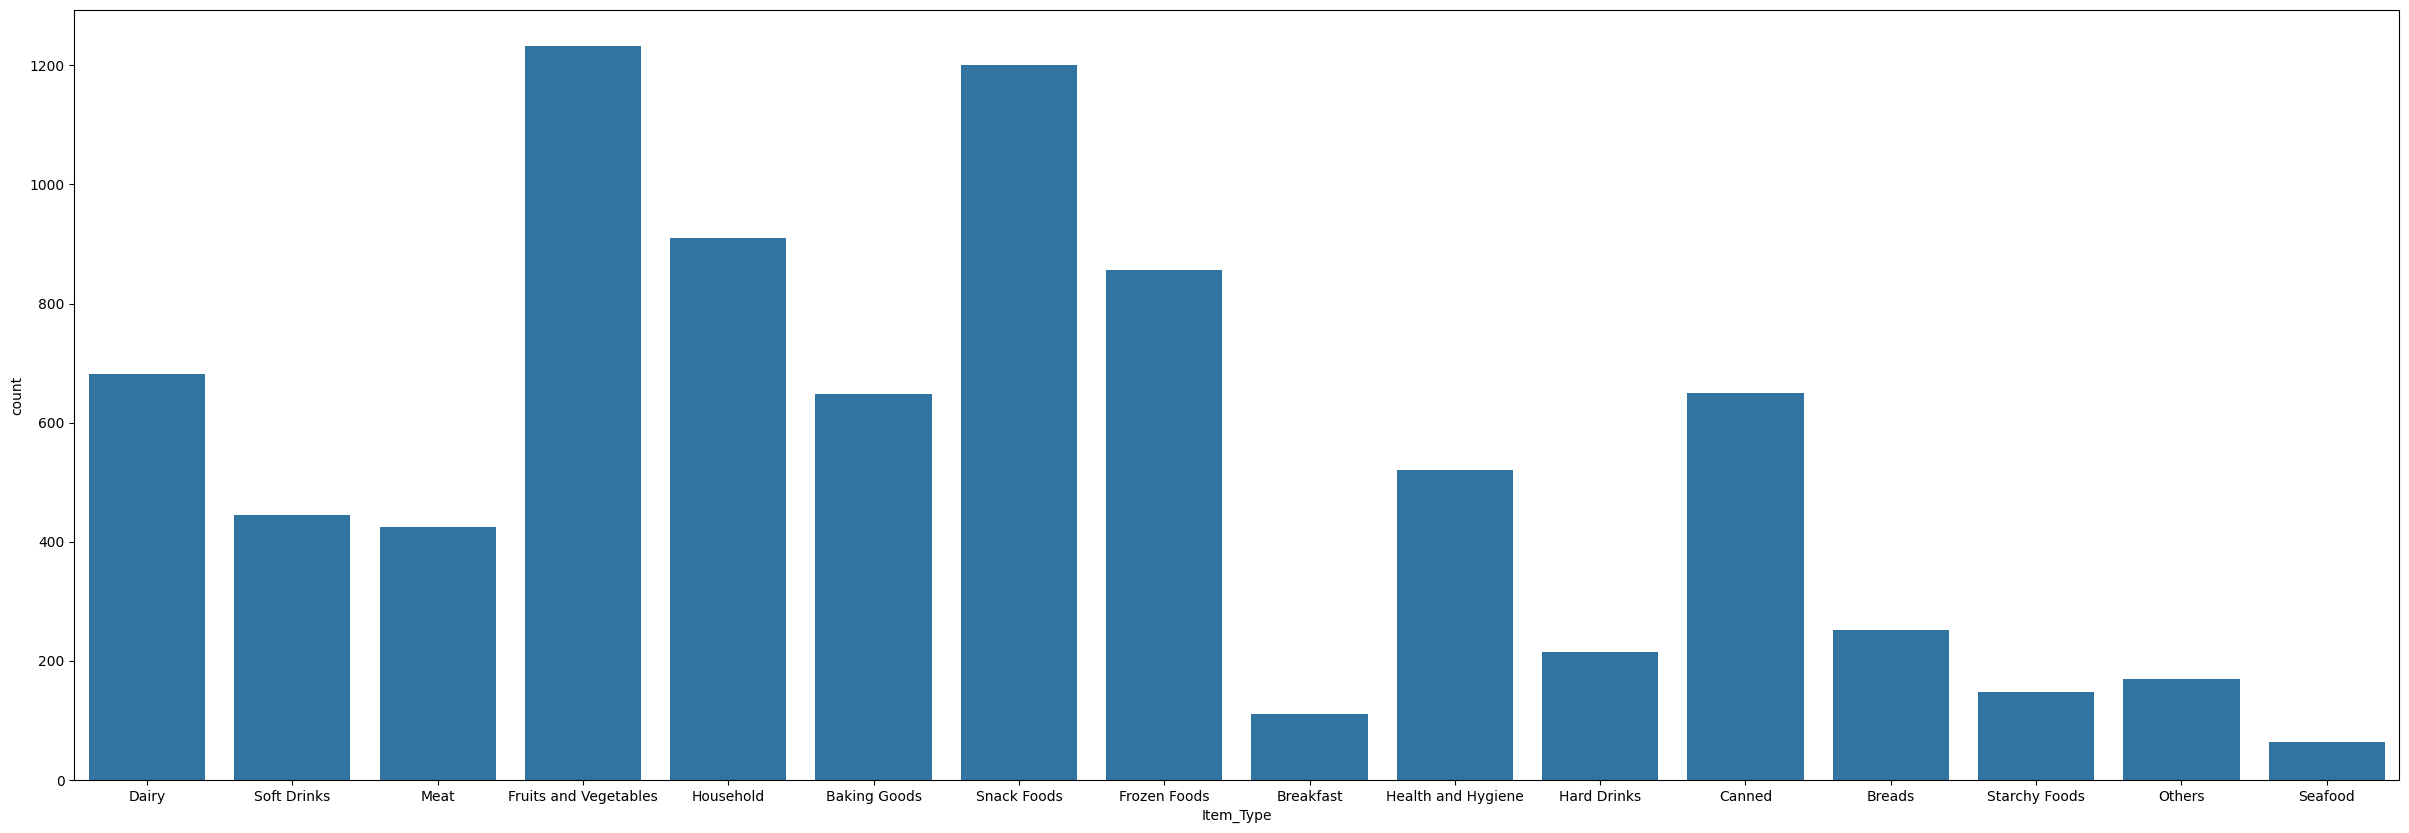

In [71]:
plt.figure(figsize=(30,10))
sns.countplot(x="Item_Type",data=data)

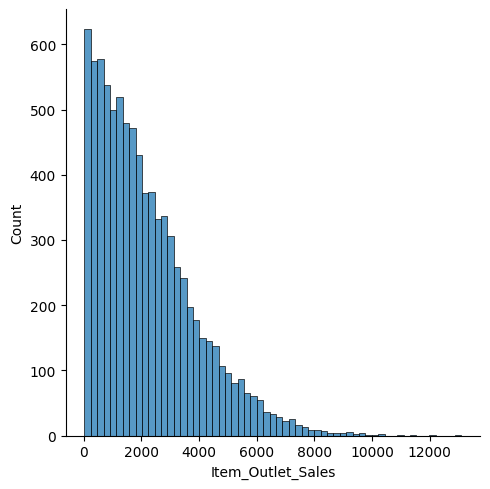

In [72]:
sns.displot(data["Item_Outlet_Sales"])
plt.show()

# Handling Categoral data

In [74]:
labelen=LabelEncoder()
label=labelen.fit_transform(data["Item_Type"])
data["Item_Type"]=label

In [77]:
data["Item_Type"].value_counts()

Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: count, dtype: int64

# for label for all rest of dataseta

In [88]:
data["Outlet_Location_Type"]=labelen.fit_transform(data["Outlet_Location_Type"])
data["Outlet_Type"]=labelen.fit_transform(data["Outlet_Type"])
data["Outlet_Identifier"]=labelen.fit_transform(data["Outlet_Identifier"])
data["Outlet_Size"]=labelen.fit_transform(data["Outlet_Size"])
data["Item_Identifier"]=labelen.fit_transform(data["Item_Identifier"])
data["Item_Fat_Content"]=labelen.fit_transform(data["Item_Fat_Content"])

In [89]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [86]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,Regular,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,Low Fat,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,Regular,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.93,Low Fat,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Spliting data for Train_Test_Split
# x=all data except Item_Outlet_Sales
# y=Item_Outlet_Sales

In [90]:
x=data.drop(columns='Item_Outlet_Sales',axis=1)
y=data["Item_Outlet_Sales"]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=100)

In [96]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6392, 11) (2131, 11)


Ml Model

In [99]:
regressor=XGBRegressor()
regressor.fit(x_train,y_train)
trainedx_data=regressor.predict(x_train)
print(trainedx_data)

[1705.4406 2991.6245 3457.4136 ... 7333.1997 4432.8335  298.2188]


In [105]:
fin_train=metrics.r2_score(y_train,trainedx_data)

for as well for testing data

In [106]:
regressortest=XGBRegressor()
regressortest.fit(x_train,y_train)
test_data=regressortest.predict(x_test)
print(test_data)

[2504.8638 3558.957  7190.187  ... 2099.7021 4263.7075 2743.6472]


In [107]:
fin_test=metrics.r2_score(y_test,test_data)

# ***Output***

In [109]:
print("the final train result is:",fin_train*100,"%")
print("the final test result is:",fin_test*100,"%")

the final train result is: 88.5238651478047 %
the final test result is: 48.879484053641 %
